In [1]:
import pandas as pd
import numpy as np

<Axes: xlabel='x', ylabel='y'>

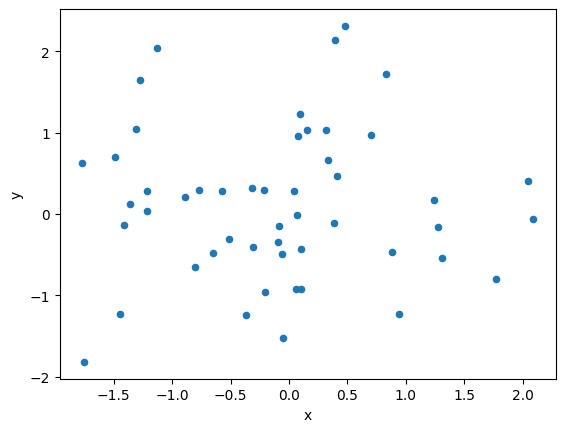

In [2]:
np.random.seed(2020)

one_df = pd.DataFrame({
    "x": np.random.normal(size=50),
    "y": np.random.normal(size=50),
})
one_df.plot.scatter(x="x", y="y")

<Axes: xlabel='x', ylabel='y'>

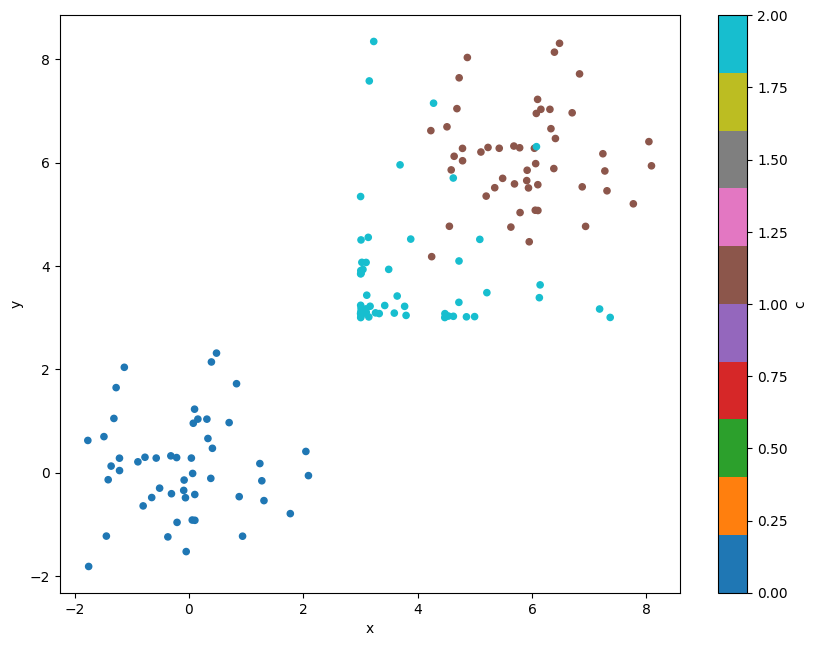

In [3]:
blobs_df = pd.concat([
    one_df.assign(c=0),
    (one_df + 6).assign(c=1),
    (one_df ** 2 + 3).assign(c=2),
])

blobs_df.plot.scatter(x="x", y="y", c="c", cmap="tab10", figsize=(10, 7.5))

Mamy problem, w którym jedna z podklas jest łatwo separowalna, a pozostałe dwie delikatnie ze sobą związane.

### Strategie rozszerzania klasyfikatorów binarnych do wieloklasowych
#### One-vs-Rest
Aplikowanie metod takich jak regresja logistyczna do rozpoznawania wielu klas jest możliwe m.in. dzięki stworzeniu szeregu klasyfikatorów, gdzie zadaniem każdego pojedynczego klasyfikatora jest detekcja pewnej pojedynczej klasy. W strategii One-vs-Rest, dla problemu N-klasowego mamy *N* modeli, gdzie każdy z nich rozpoznaje pewną specyficzną etykietę.

Dość istotne jest tutaj to, żeby nasze bazowe modele zwracały pewną wartości pewności co do przynależności do obiektu danej klasy, dzięki czemu możemy zawsze wybrać tę, która ma przypisane maksymalne prawdopodobieństwo.

In [4]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [5]:
svm = LinearSVC(max_iter=10000)
one_vs_rest = OneVsRestClassifier(svm)

In [6]:
one_vs_rest.fit(blobs_df.drop(columns="c"), blobs_df["c"])

OneVsRestClassifier(estimator=LinearSVC(max_iter=10000))

In [7]:
x_test = np.linspace(-2, 10, 1000)
y_test = np.linspace(-2, 10, 1000)

In [8]:
import matplotlib.pyplot as plt

In [9]:
xx, yy = np.meshgrid(x_test, y_test)
Z = one_vs_rest.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


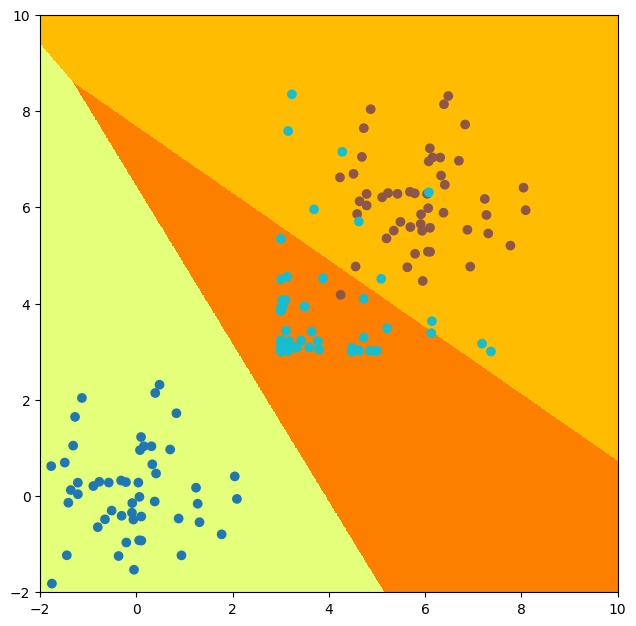

In [10]:
plt.figure(figsize=(10, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 10, -2, 10), cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], c=blobs_df["c"], cmap="tab10")

#### One-vs-One
W tej strategii tworzymy n(n-1)/2 klasyfikatorów, osobno dla każdej pary klas. Aby poprawnie zaklasyfikować daną obserwację przeprowadzamy głosowanie i wybieramy tę klasę która zdobędzie najwięcej głosów.

In [11]:
from sklearn.multiclass import OneVsOneClassifier

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


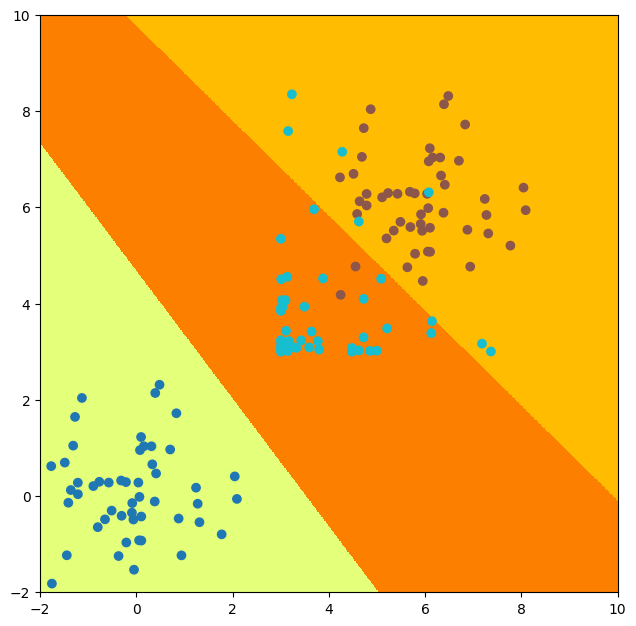

In [12]:
one_vs_one = OneVsOneClassifier(svm)
one_vs_one.fit(blobs_df.drop(columns="c"), blobs_df["c"])
x_test = np.linspace(-2, 10, 1000)
y_test = np.linspace(-2, 10, 1000)
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(x_test, y_test)
Z = one_vs_one.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 10, -2, 10), cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], c=blobs_df["c"], cmap="tab10")